# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from datetime import datetime
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
11367,id_2707,London,"['European', 'British', 'Gluten Free Options']",2712.0,$$ - $$$,74.0,"[['The Finest High Tea in London', 'Wonderful ...",/Restaurant_Review-g186338-d1408975-Reviews-Eg...,d1408975,1,4.5
1920,id_1920,Paris,NaN,9807.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187147-d1331456-Reviews-So...,d1331456,0,0.0
34960,id_8688,Madrid,['Spanish'],8695.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187514-d8708074-Reviews-La...,d8708074,1,5.0
28365,id_1069,Edinburgh,"['Italian', 'Vegetarian Friendly']",1070.0,$$ - $$$,29.0,"[['Dinner', 'A fit persons place?'], ['01/06/2...",/Restaurant_Review-g186525-d13047896-Reviews-V...,d13047896,1,3.5
33930,id_6716,Madrid,NaN,6719.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187514-d11903277-Reviews-C...,d11903277,1,3.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

#### Number of Reviews

In [15]:
data['Number of Reviews NA'] = data['Number of Reviews'].apply(lambda x: 1 if pd.isna(x) else 0)
# заменим NaN для пропусков в 'Number of Reviews' на 0 как наиболее логичное значение 
# для пропуска в данном случае
data['Number of Reviews'].fillna(0, inplace=True)

In [16]:
display(data.loc[:, ['Number of Reviews', 'Number of Reviews NA']].sample(5))
display(data.loc[:, ['Number of Reviews', 'Number of Reviews NA']].info())

,Number of Reviews,Number of Reviews NA
18468,25.0,0
41516,36.0,0
41358,4.0,0
17333,73.0,0
44815,38.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
Number of Reviews       50000 non-null float64
Number of Reviews NA    50000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 781.4 KB


None

#### Price Range

In [17]:
data['Price Range NA'] = data['Price Range'].apply(lambda x: 1 if pd.isna(x) else 0)

In [18]:
# признак содержит ординальные данные определяющие ценовую категорию
# ресторана, для заполнения выберем наболее распространенную категорию
# - среднюю
display(data['Price Range'].value_counts())
print('price_range mode:', data['Price Range'].mode()[0])

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

price_range mode: $$ - $$$


In [19]:
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)

In [20]:
display(data.loc[:, ['Price Range', 'Price Range NA']].sample(5))
display(data.loc[:, ['Price Range', 'Price Range NA']].info())

,Price Range,Price Range NA
19518,$$ - $$$,0
26164,$$ - $$$,0
22660,$,0
37214,$$ - $$$,1
16943,$$ - $$$,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
Price Range       50000 non-null object
Price Range NA    50000 non-null int64
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


None

#### Cuisine Style

In [21]:
data['Cuisine Style NA'] = data['Cuisine Style'].apply(lambda x: 1 if pd.isna(x) else 0)

In [22]:
data['Cuisine Style NA'].value_counts()
# Заполним пропуски в cuisine во время обработки значений позже..

0    38410
1    11590
Name: Cuisine Style NA, dtype: int64

#### reviews

In [23]:
data['Reviews NA'] = data['Reviews'].apply(lambda x: 1 if pd.isna(x) else 0)

In [24]:
data['Reviews NA'].value_counts()
# Заполним пропуски в reviews во время обработки значений позже

0    49998
1        2
Name: Reviews NA, dtype: int64

### 2. Обработка признаков и добавление новых
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [25]:
data.nunique(dropna=False)

Restaurant_id           13094
City                       31
Cuisine Style           10732
Ranking                 12975
Price Range                 3
Number of Reviews        1574
Reviews                 41858
URL_TA                  49963
ID_TA                   49963
sample                      2
Rating                     10
Number of Reviews NA        2
Price Range NA              2
Cuisine Style NA            2
Reviews NA                  2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

#### city

In [26]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
# Сохраним названия городов - возможно, используем позже (get_dummies это делать, похоже, не умеет)
data['City_name'] = data['City']
data = pd.get_dummies(data, columns=['City'], dummy_na=False)

In [27]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
43391,id_7892,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",7901.0,$$ - $$$,42.0,"[['Go for it', 'Quiet Place But Pleasant'], ['...",/Restaurant_Review-g186338-d11714972-Reviews-M...,d11714972,1,3.5,...,0,0,0,0,0,0,0,0,0,0
37553,id_648,['Sushi'],649.0,$$ - $$$,18.0,"[['Best sushi ever!!!'], ['08/07/2017']]",/Restaurant_Review-g189180-d5786861-Reviews-Su...,d5786861,1,4.5,...,0,1,0,0,0,0,0,0,0,0
2414,id_2414,"['Japanese', 'Seafood', 'Sushi', 'Asian']",2202.0,$,83.0,"[['Here’s a short one…', 'great service and gr...",/Restaurant_Review-g187323-d1342746-Reviews-Su...,d1342746,0,0.0,...,0,0,0,0,0,0,0,0,0,0
36825,id_6383,"['Cafe', 'Vegetarian Friendly']",6392.0,$,24.0,"[['Good choice of food and service', 'Great Ha...",/Restaurant_Review-g186338-d7911928-Reviews-Go...,d7911928,1,4.0,...,0,0,0,0,0,0,0,0,0,0
4042,id_4042,"['Bar', 'European', 'Pub', 'Scandinavian', 'Da...",118.0,$$ - $$$,456.0,[['Beer and food go together at Nørrebro Bryg....,/Restaurant_Review-g189541-d711875-Reviews-Nor...,d711875,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Price Range

In [29]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [30]:
def price_range_to_num(val):
    '''
    Конвертирует строковое значение ценового диапазона на
    числовое, e.g.:
    $:                   1 
    $$-$$$:              2
    в остальных случаях: 3
    Returns:
        Числовое значение соответствующее ценовому диапазону
    '''
    if val == '$':        
        return 1
    elif val == '$$ - $$$':
        return 2
    elif val == '$$$$':
        return 3
    else:
        val
    
    
data['Price Range'] = data['Price Range'].apply(price_range_to_num)

In [31]:
data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

#### Reviews
Данный признак содержит сложное значение (list of lists) как строку содержащую два последних ревью и даты их опубликования.

In [32]:
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [33]:
# сначала пропущенные значения
sum(data['Reviews'].isna())

2

In [34]:
data['Reviews'].fillna('[[], []]', inplace=True)

Текст ревью в данном случае использовать не будем, а на основе дат добавим признаки количества дней между двумя послденими ревью и количество дней с момента последнего ревью

In [35]:
# паттерн для поиска дат
pattern = re.compile('\'\d+\/\d+\/\d+\'')
dates = data['Reviews'].apply(pattern.findall)
# врeменные признаки
data['date1'] = pd.to_datetime(dates.apply(lambda x: x[0] if len(x) > 0 else None))
data['date2'] = pd.to_datetime(dates.apply(lambda x: x[1] if len(x) > 1 else None))

display(data.loc[:, ['date1', 'date2']].sample(5))

,date1,date2
35977,2009-07-21,NaT
12405,2017-11-20,2017-10-16
36041,2013-05-12,2012-12-03
40047,2017-06-25,2017-05-27
5713,2017-12-29,2017-12-22


#### reviews_day_delta & reviews_days_since

In [36]:

def days_since_last_review(r):
    '''
    Считает количество дней с последней даты ревью данной записи
    датасета. Учитывает отсутствие одной из дат и пропуск (возвращает
    0 в последнем случае)
    '''
    datetime_now = datetime.now();
    if pd.notna(r.date1) and pd.notna(r.date2):
        if r.date1 > r.date2:
            return (datetime_now - r.date1).days
        else:
            return (datetime_now - r.date2).days
    else:
        if pd.notna(r.date1):
            return (datetime_now - r.date1).days
        if pd.notna(r.date2):
            return (datetime_now - r.date2).days        
    return 0 


def reviews_days_delta(r):
    '''
    Возвращает количество дней между двумя датами ревью в данной записи
    датасета. Учитывает отсутствие (одной из) дат - возвращает 0 в данном
    случае.
    '''
    if pd.notna(r.date1) and pd.notna(r.date2):
        return abs((r.date1 - r.date2).days)
    else:
        return 0

# новые признаки на основе дат последних ревью: количество дней между
# двумя последними ревью и количество дней со времени последнего ревью
data['Reviews Days Delta'] = data.apply(lambda row: reviews_days_delta(row), axis=1)
data['Reviews Days Since'] = data.apply(lambda row: days_since_last_review(row), axis=1)
# удаляем временные признаки
data.drop(['date1', 'date2'], inplace=True, axis=1)

In [37]:
display(data.sample(5))

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,Reviews Days Delta,Reviews Days Since
22834,id_4593,"['Pub', 'Gastropub']",4594.0,2,11.0,"[[], []]",/Restaurant_Review-g187791-d9702232-Reviews-Ly...,d9702232,1,4.5,...,0,0,0,1,0,0,0,0,0,0
15369,id_1140,"['Mediterranean', 'Turkish', 'Middle Eastern',...",1142.0,1,28.0,"[['Tasty Kebab selection', 'Brilliant Turkish ...",/Restaurant_Review-g187323-d5505498-Reviews-So...,d5505498,1,4.5,...,0,0,0,0,0,0,0,0,174,1204
45326,id_5770,['French'],5771.0,2,58.0,"[[""Local Food at it's Best"", 'Great food & goo...",/Restaurant_Review-g187147-d3454189-Reviews-Le...,d3454189,1,4.0,...,0,1,0,0,0,0,0,0,1023,1452
3339,id_3339,NaN,7723.0,2,15.0,"[['Rita is the star of the show!', 'Vegan frie...",/Restaurant_Review-g186338-d10038001-Reviews-P...,d10038001,0,0.0,...,0,0,0,0,0,0,0,0,126,1269
40546,id_2481,NaN,2484.0,2,8.0,"[['amazing beers'], ['05/26/2017']]",/Restaurant_Review-g189158-d6611930-Reviews-Ta...,d6611930,1,4.0,...,0,0,0,0,0,0,0,0,0,1424


#### Ranking
ranking, возможно, полезнее рассматривать в контексте населения города и количества ресторанов в городе - создим новые признаки для этого.

#### Ranking To Rest Num & Ranking To Population

In [38]:
#население территории города (metro area) - источник: wiki
city_population = {'Paris':13024, 'Stockholm':2391, 'London':14257, 
                   'Berlin':6144, 'Munich':5991, 'Oporto':1721,
                   'Milan':4336, 'Bratislava':659, 'Vienna':2600, 
                   'Rome':4342, 'Barcelona':5474, 'Madrid':6791,
                   'Dublin':1417, 'Brussels':2500, 'Zurich':415, 
                   'Warsaw':3100, 'Budapest':3011, 'Copenhagen':2057,
                   'Amsterdam':2480, 'Lyon':2323, 'Hamburg':5107, 
                   'Lisbon':2827, 'Prague':2677, 'Oslo':1588,
                   'Helsinki':1525, 'Edinburgh':901, 'Geneva':201, 
                   'Ljubljana':537, 'Athens':2928,'Luxembourg':633, 
                   'Krakow':1752}

#количество ресторанов в городе - источник: датасет
rest_per_city = data.City_name.value_counts().to_dict()

data['Ranking To Rest Num'] = data.apply(lambda r: (r['Ranking'] / rest_per_city[r.City_name]), axis=1)
data['Ranking To Population'] = data.apply(lambda r: (r['Ranking'] / city_population[r.City_name]), axis=1)
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,Reviews Days Delta,Reviews Days Since,Ranking To Rest Num,Ranking To Population
41092,id_1611,NaN,1614.0,2,3.0,"[['Not worth a go', 'fremragende pizza'], ['07...",/Restaurant_Review-g189541-d1081386-Reviews-Pi...,d1081386,1,3.5,...,0,0,0,0,0,0,1485,3198,1.970696,0.784638
1883,id_1883,"['Japanese', 'Sushi', 'Asian', 'Fast Food', 'V...",9825.0,1,21.0,"[[""On my way to St. Paul's cathedral I had a.....",/Restaurant_Review-g186338-d5220325-Reviews-It...,d5220325,0,0.0,...,0,0,0,0,0,0,20,1351,1.365911,0.689135
12667,id_458,['French'],459.0,2,3.0,"[['Lunch'], ['12/30/2016']]",/Restaurant_Review-g190356-d7607585-Reviews-Br...,d7607585,1,3.5,...,0,0,0,0,0,0,0,1571,1.745247,0.725118
35334,id_2120,['Cafe'],2121.0,1,5.0,[['obvious place to explore Croix Rousse from'...,/Restaurant_Review-g187265-d8374888-Reviews-Le...,d8374888,1,4.0,...,0,0,0,0,0,0,0,1388,1.883659,0.913043
28137,id_2875,['Mediterranean'],2876.0,2,26.0,"[['Great Restaurant', 'If you are staying at t...",/Restaurant_Review-g187497-d6714826-Reviews-Ro...,d6714826,1,4.0,...,0,0,0,0,0,0,496,1267,0.847128,0.525393


#### Number Of Reviews
Так же добавим признак выражающий отношение количества ревью к населению (интересно было бы учесть поток туристов, наверное, тоже)

In [39]:
data['Reviews Num To Population'] = data.apply(lambda r: (r['Number of Reviews'] / city_population[r.City_name]), axis=1)

#### Population
Почему бы не добавить и население города как признак

In [40]:
data['Population'] = data.City_name.apply(lambda x: (city_population[x]))

#### Cuisine Style
Содержит строки, состоящие из списка cuisine style. Необходимо решить, что делать с пропущенными значениями и представить данные в формате доступном для ML.
Dummy'фикация cuisine не дала значительного улучшения MAE, как и другие попытки. Решено оставить данный признак.

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

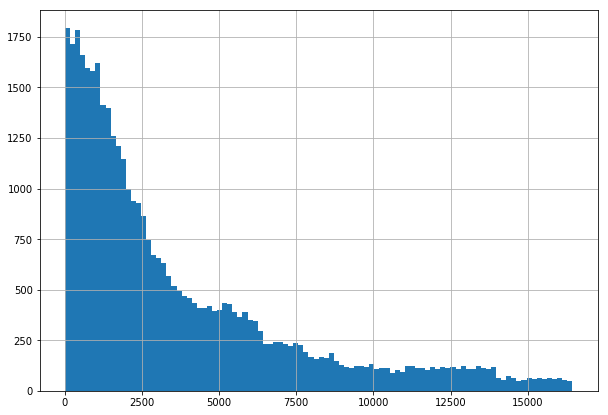

In [41]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

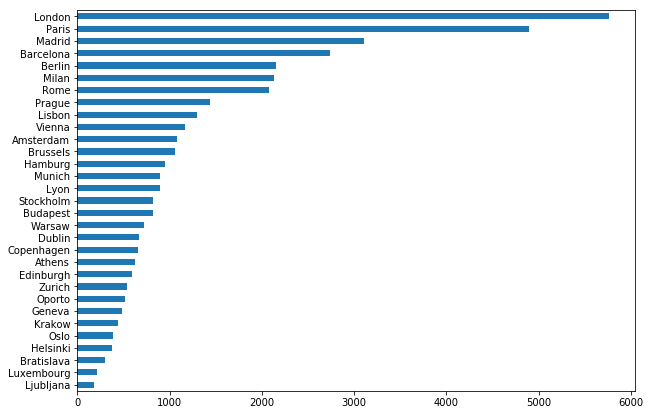

In [42]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

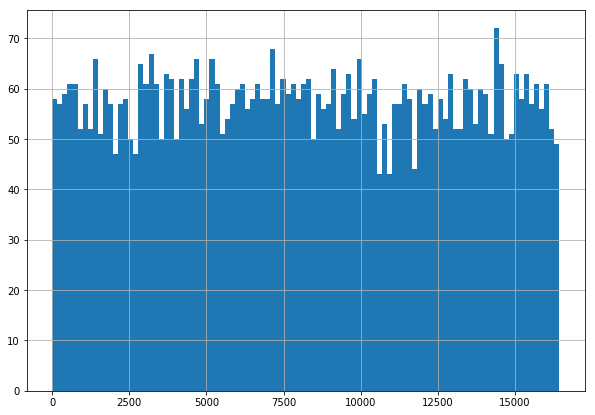

In [43]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

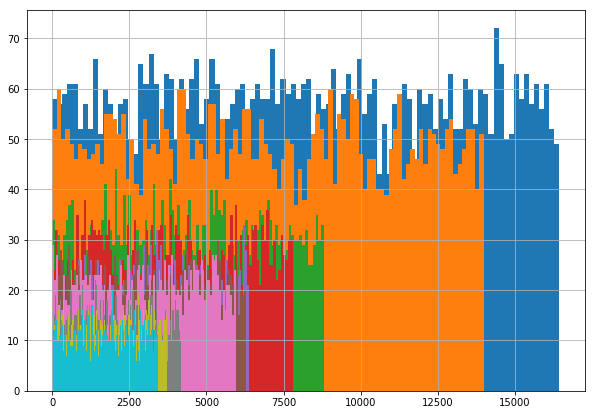

In [44]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.


### Посмотрим распределение целевой переменной

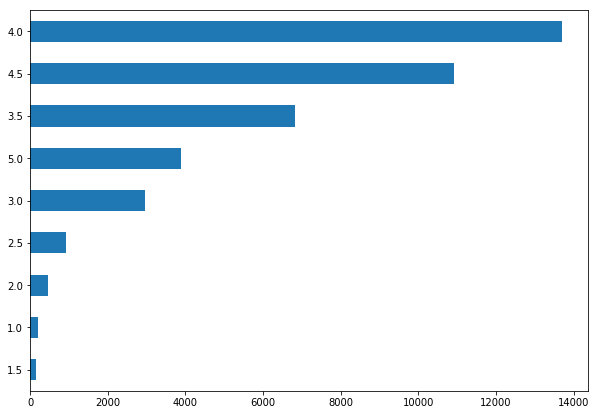

In [45]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

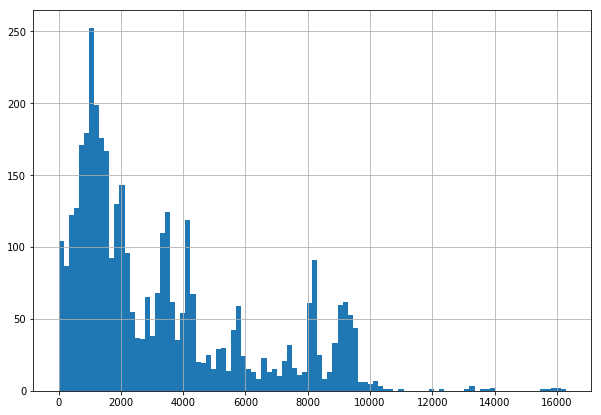

In [46]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

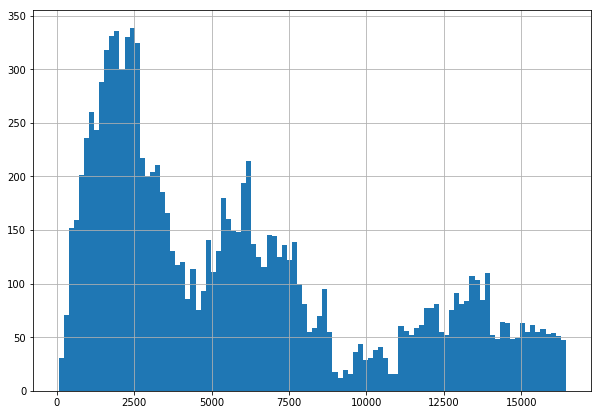

In [47]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

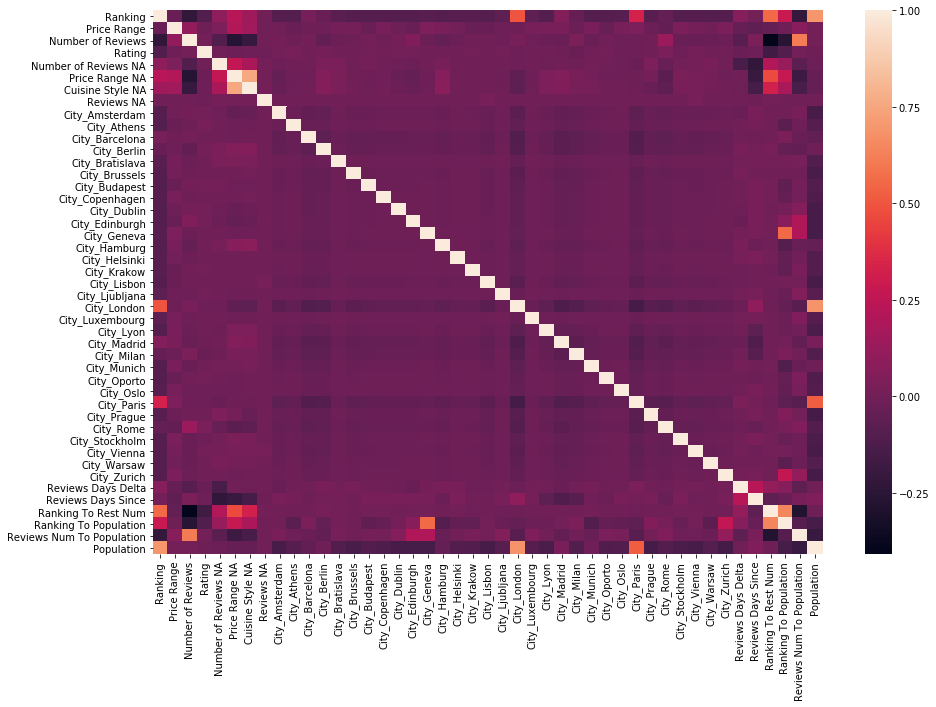

In [48]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [49]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [50]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews NA'] = df_output['Number of Reviews'].apply(lambda x: 1 if pd.isna(x) else 0)
    # заменим NaN для пропусков в 'Number of Reviews' на 0 как наиболее логичное значение 
    # для пропуска в данном случае
    df_output['Number of Reviews'].fillna(0, inplace=True)  
    
    df_output['Price Range NA'] = df_output['Price Range'].apply(lambda x: 1 if pd.isna(x) else 0)
    # признак содержит ординальные данные определяющие ценовую категорию ресторана, для 
    # заполнения выберем наболее распространенную категорию - среднюю
    df_output['Price Range'].fillna(df_output['Price Range'].mode()[0], inplace=True)
    
    df_output['Cuisine Style NA'] = df_output['Cuisine Style'].apply(lambda x: 1 if pd.isna(x) else 0)
    # Заполним пропуски в cuisine во время обработки значений позже..
    df_output['Cuisine Style'].fillna('[Unspecified]')
    
    df_output['Reviews NA'] = df_output['Reviews'].apply(lambda x: 1 if pd.isna(x) else 0)
    df_output['Reviews'].fillna('[[], []]', inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # Сохраним названия городов - возможно, используем позже (get_dummies это делать, похоже, не умеет)
    df_output['City_name'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=['City'], dummy_na=False)
    
    def price_range_to_num(val):
        '''
        Конвертирует строковое значение ценового диапазона на
        числовое, e.g.:
        $:                   1 
        $$-$$$:              2
        в остальных случаях: 3
        Returns:
            Числовое значение соответствующее ценовому диапазону
        '''
        if val == '$':        
            return 1
        elif val == '$$ - $$$':
            return 2
        elif val == '$$$$':
            return 3
        else:
            val
        
    df_output['Price Range'] = df_output['Price Range'].apply(price_range_to_num)
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    # паттерн для поиска дат
    pattern = re.compile('\'\d+\/\d+\/\d+\'')
    dates = df_output['Reviews'].apply(pattern.findall)
    # врeменные признаки
    df_output['date1'] = pd.to_datetime(dates.apply(lambda x: x[0] if len(x) > 0 else None))
    df_output['date2'] = pd.to_datetime(dates.apply(lambda x: x[1] if len(x) > 1 else None))
    
    def days_since_last_review(r):
        '''
        Считает количество дней с последней даты ревью данной записи
        датасета. Учитывает отсутствие одной из дат и пропуск (возвращает
        0 в последнем случае)
        '''
        datetime_now = datetime.now();
        if pd.notna(r.date1) and pd.notna(r.date2):
            if r.date1 > r.date2:
                return (datetime_now - r.date1).days
            else:
                return (datetime_now - r.date2).days
        else:
            if pd.notna(r.date1):
                return (datetime_now - r.date1).days
            if pd.notna(r.date2):
                return (datetime_now - r.date2).days        
        return 0 


    def reviews_days_delta(r):
        '''
        Возвращает количество дней между двумя датами ревью в данной записи
        датасета. Учитывает отсутствие (одной из) дат - возвращает 0 в данном
        случае.
        '''
        if pd.notna(r.date1) and pd.notna(r.date2):
            return abs((r.date1 - r.date2).days)
        else:
            return 0
    
    df_output['Reviews Days Delta'] = df_output.apply(lambda row: reviews_days_delta(row), axis=1)
    df_output['Reviews Days Since'] = df_output.apply(lambda row: days_since_last_review(row), axis=1)
    # удаляем временные признаки
    df_output.drop(['date1', 'date2'], inplace=True, axis=1)
    
    #население территории города (metro area) - источник: wiki
    city_population = {'Paris':13024, 'Stockholm':2391, 'London':14257, 
                       'Berlin':6144, 'Munich':5991, 'Oporto':1721,
                       'Milan':4336, 'Bratislava':659, 'Vienna':2600, 
                       'Rome':4342, 'Barcelona':5474, 'Madrid':6791,
                       'Dublin':1417, 'Brussels':2500, 'Zurich':415, 
                       'Warsaw':3100, 'Budapest':3011, 'Copenhagen':2057,
                       'Amsterdam':2480, 'Lyon':2323, 'Hamburg':5107, 
                       'Lisbon':2827, 'Prague':2677, 'Oslo':1588,
                       'Helsinki':1525, 'Edinburgh':901, 'Geneva':201, 
                       'Ljubljana':537, 'Athens':2928,'Luxembourg':633, 
                       'Krakow':1752}
    
    # количество ресторанов в городе - источник: датасет
    rest_per_city = df_output.City_name.value_counts().to_dict()
    
    df_output['Ranking To Rest Num'] = df_output.apply(lambda r: (r['Ranking'] / rest_per_city[r.City_name]), axis=1)
    df_output['Ranking To Population'] = df_output.apply(lambda r: (r['Ranking'] / city_population[r.City_name]), axis=1) 
    df_output['Reviews Num To Population'] = df_output.apply(lambda r: (r['Number of Reviews'] / city_population[r.City_name]), axis=1)
    df_output['Population'] = df_output.City_name.apply(lambda x: (city_population[x]))
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [51]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number of Reviews NA,Price Range NA,Cuisine Style NA,Reviews NA,City_Amsterdam,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,Reviews Days Delta,Reviews Days Since,Ranking To Rest Num,Ranking To Population,Reviews Num To Population,Population
48506,2477.0,2,2.0,1,3.0,0,1,1,0,0,...,0,0,0,0,0,1401,2.088533,0.485021,0.000392,5107
9874,8140.0,2,0.0,0,0.0,1,1,1,0,0,...,0,0,0,0,0,0,1.332678,0.625000,0.000000,13024
33442,1554.0,2,5.0,1,4.0,0,1,1,0,0,...,0,0,0,0,888,3008,2.002577,0.530738,0.001708,2928
11490,5814.0,1,2.0,1,5.0,0,0,0,0,0,...,0,0,0,0,0,0,2.245655,1.339014,0.000461,4342
41704,2211.0,2,38.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0.361984,0.169764,0.002918,13024
8547,543.0,1,92.0,0,0.0,0,0,0,0,0,...,0,1,0,0,154,1333,0.376299,0.208846,0.035385,2600
24232,6336.0,2,21.0,1,3.5,0,1,1,0,0,...,0,0,0,0,0,0,1.866274,1.157472,0.003836,5474
12603,6905.0,2,0.0,1,3.0,1,1,0,0,0,...,0,0,0,0,0,0,2.033873,1.261418,0.000000,5474
21640,769.0,2,51.0,1,5.0,0,0,0,0,0,...,0,0,0,0,26,1290,0.125900,0.059045,0.003916,13024
28171,835.0,2,4.0,1,3.5,0,1,0,0,0,...,0,0,0,0,445,2077,1.757895,0.547541,0.002623,1525


In [52]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Ranking                      50000 non-null float64
Price Range                  50000 non-null int64
Number of Reviews            50000 non-null float64
sample                       50000 non-null int64
Rating                       50000 non-null float64
Number of Reviews NA         50000 non-null int64
Price Range NA               50000 non-null int64
Cuisine Style NA             50000 non-null int64
Reviews NA                   50000 non-null int64
City_Amsterdam               50000 non-null uint8
City_Athens                  50000 non-null uint8
City_Barcelona               50000 non-null uint8
City_Berlin                  50000 non-null uint8
City_Bratislava              50000 non-null uint8
City_Brussels                50000 non-null uint8
City_Budapest                50000 non-null uint8
City_Copenhagen              50000 non-null uint8
City_Dublin                  50000 

In [53]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [54]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [55]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 45), (40000, 45), (40000, 44), (32000, 44), (8000, 44))

# Model 
Сам ML

In [56]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [57]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [58]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20216312499999997


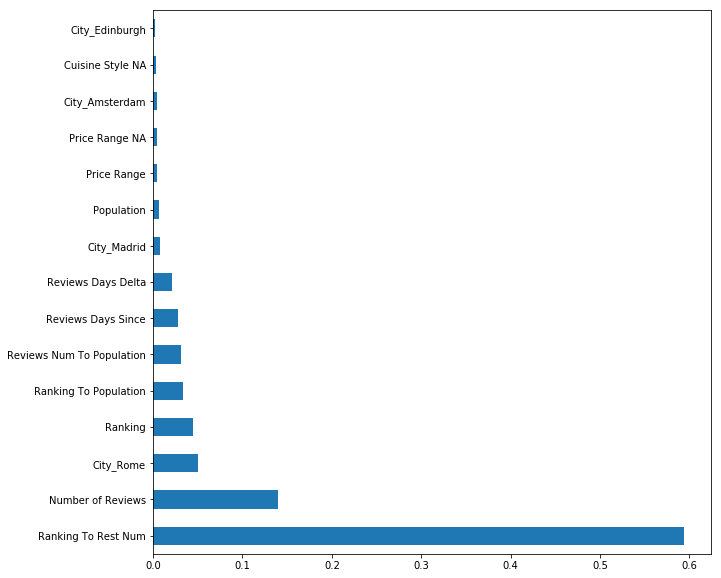

In [60]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [61]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number of Reviews NA,Price Range NA,Cuisine Style NA,Reviews NA,City_Amsterdam,City_Athens,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,Reviews Days Delta,Reviews Days Since,Ranking To Rest Num,Ranking To Population,Reviews Num To Population,Population
1307,557.0,1,12.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2241,1.005415,0.317922,0.006849,1752
4772,1305.0,2,4.0,0.0,0,1,0,0,0,0,...,0,0,0,0,173,1843,1.751678,1.448391,0.004440,901
3790,995.0,2,4.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,2058,1.686441,4.950249,0.019900,201
646,69.0,2,739.0,0.0,0,0,0,0,0,0,...,0,0,0,0,3,1206,0.082536,0.048694,0.521524,1417
4602,5079.0,2,1057.0,0.0,0,0,0,0,0,0,...,0,0,0,0,91,1308,1.961761,1.169737,0.243436,4342
6681,10508.0,2,29.0,0.0,0,0,0,0,0,0,...,0,0,0,0,523,1236,1.720367,0.806818,0.002227,13024
2362,6975.0,2,114.0,0.0,0,0,0,0,0,0,...,0,0,0,0,154,1429,2.054492,1.274205,0.020826,5474
6965,1395.0,2,35.0,0.0,0,0,0,0,1,0,...,0,0,0,0,48,1294,1.016764,0.562500,0.014113,2480
3618,1216.0,2,316.0,0.0,0,0,0,0,0,0,...,0,0,0,0,52,1346,0.199083,0.093366,0.024263,13024
109,722.0,2,65.0,0.0,0,0,0,0,0,0,...,0,0,0,0,53,1324,0.881563,0.350997,0.031599,2057


In [62]:
test_data = test_data.drop(['Rating'], axis=1)

In [63]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [64]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
predict_submission

array([3.11 , 4.255, 4.445, ..., 3.015, 4.48 , 4.415])

In [66]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.110
1,id_1,4.255
2,id_2,4.445
3,id_3,4.280
4,id_4,4.495
5,id_5,4.460
6,id_6,3.295
7,id_7,2.310
8,id_8,4.090
9,id_9,4.565


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
